In [ ]:
!nvidia-smi

Fri Nov  1 13:35:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/112.6 GB disk)


## EXTRACTING THE DATASET

In [ ]:
import os
import shutil
import kagglehub

home_datasets_path = '/content/datasets'

os.makedirs(home_datasets_path, exist_ok=True)

try:
    %cd {home_datasets_path}
except Exception as e:
    print(f"Error changing directory: {e}. Continuing with script.")


path = kagglehub.dataset_download("aslanahmedov/number-plate-detection")

target_path = os.path.join(home_datasets_path, "number-plate-detection")

if os.path.exists(target_path):
    shutil.rmtree(target_path)

shutil.move(path, target_path)
print(f"Dataset moved to: {target_path}")

print("Path to dataset files:", target_path)


/content/datasets


100%|██████████| 413M/413M [00:20<00:00, 21.1MB/s]

Extracting files...


Dataset moved to: /content/datasets/number-plate-detection
Path to dataset files: /content/datasets/number-plate-detection


## SEPRATING THE IMAGES AND XML FILES

In [ ]:
from pathlib import Path

data_folder = '/content/datasets/number-plate-detection/images'
output_images_folder = os.path.join(data_folder)
output_xml_folder = os.path.join('/content/datasets/number-plate-detection', 'xml')

os.makedirs(output_xml_folder, exist_ok=True)

for file in Path(data_folder).glob('*'):
    if file.suffix.lower() == '.xml':
        shutil.move(str(file), output_xml_folder)
        print(f"Moved: {file.name} to {output_xml_folder}")
    elif file.suffix.lower() in ['.jpg', '.jpeg', '.png', '.bmp']:
        new_image_name = f"{file.name}"
        new_image_path = os.path.join(output_images_folder, new_image_name)

        shutil.move(str(file), new_image_path)
        print(f"Replaced: {file.name} with {new_image_name} in {output_images_folder}")

print("Separation and replacement completed.")


Replaced: N69.jpeg with N69.jpeg in /content/datasets/number-plate-detection/images
Moved: N154.xml to /content/datasets/number-plate-detection/xml
Replaced: N57.jpeg with N57.jpeg in /content/datasets/number-plate-detection/images
Replaced: N67.jpeg with N67.jpeg in /content/datasets/number-plate-detection/images
Replaced: N4.jpeg with N4.jpeg in /content/datasets/number-plate-detection/images
Moved: N187.xml to /content/datasets/number-plate-detection/xml
Replaced: N117.jpeg with N117.jpeg in /content/datasets/number-plate-detection/images
Replaced: N96.jpeg with N96.jpeg in /content/datasets/number-plate-detection/images
Replaced: N43.jpeg with N43.jpeg in /content/datasets/number-plate-detection/images
Replaced: N91.jpeg with N91.jpeg in /content/datasets/number-plate-detection/images
Replaced: N95.jpeg with N95.jpeg in /content/datasets/number-plate-detection/images
Replaced: N190.jpeg with N190.jpeg in /content/datasets/number-plate-detection/images
Moved: N135.xml to /content/da

## CONVERTING .XML TO .TXT

In [ ]:
import xml.etree.ElementTree as ET

def convert_xml_to_yolo(xml_folder, output_folder, target_class="license_plate"):
    os.makedirs(output_folder, exist_ok=True)

    for xml_file in os.listdir(xml_folder):
        if xml_file.endswith(".xml"):
            tree = ET.parse(os.path.join(xml_folder, xml_file))
            root = tree.getroot()

            image_name = root.find('filename').text
            img_width = int(root.find('size/width').text)
            img_height = int(root.find('size/height').text)
            yolo_data = []

            for obj in root.findall('object'):
                class_name = target_class
                class_id = 0

                bbox = obj.find('bndbox')

                xmin = int(bbox.find('xmin').text)
                ymin = int(bbox.find('ymin').text)
                xmax = int(bbox.find('xmax').text)
                ymax = int(bbox.find('ymax').text)

                x_center = (xmin + xmax) / (2.0 * img_width)
                y_center = (ymin + ymax) / (2.0 * img_height)
                width = (xmax - xmin) / img_width
                height = (ymax - ymin) / img_height

                yolo_data.append(f"{class_id} {x_center} {y_center} {width} {height}")

            if yolo_data:
                label_file = os.path.join(output_folder, f"{os.path.splitext(image_name)[0]}.txt")
                with open(label_file, "w") as file:
                    file.write("\n".join(yolo_data))
                print(f"Created label file: {label_file} with {len(yolo_data)} annotations.")
            else:
                print(f"No annotations for {image_name}, label file not created.")

    classes_file = os.path.join(output_folder, "classes.txt")
    with open(classes_file, "w") as file:
        file.write(f"{target_class}\n")
    print(f"Class name '{target_class}' saved to: {classes_file}")

xml_folder = "/content/datasets/number-plate-detection/xml"
output_folder = "/content/datasets/number-plate-detection/labels"

convert_xml_to_yolo(xml_folder, output_folder, target_class="license_plate")


Created label file: /content/datasets/number-plate-detection/labels/N154.txt with 1 annotations.
Created label file: /content/datasets/number-plate-detection/labels/N187.txt with 1 annotations.
Created label file: /content/datasets/number-plate-detection/labels/N135.txt with 1 annotations.
Created label file: /content/datasets/number-plate-detection/labels/N145.txt with 1 annotations.
Created label file: /content/datasets/number-plate-detection/labels/N212.txt with 1 annotations.
Created label file: /content/datasets/number-plate-detection/labels/N74.txt with 1 annotations.
Created label file: /content/datasets/number-plate-detection/labels/N102.txt with 1 annotations.
Created label file: /content/datasets/number-plate-detection/labels/N213.txt with 1 annotations.
Created label file: /content/datasets/number-plate-detection/labels/N244.txt with 1 annotations.
Created label file: /content/datasets/number-plate-detection/labels/N24.txt with 1 annotations.
Created label file: /content/dat

## READING THE CLASSES

In [ ]:
def read_text_file(file_path):
    try:
        with open(file_path, 'r') as file:
            content = file.read()
        print(content)
    except FileNotFoundError:
        print(f"The file at {file_path} was not found.")
    except IOError:
        print(f"An error occurred while reading the file at {file_path}.")

file_path = '/content/datasets/number-plate-detection/labels/classes.txt'
read_text_file(file_path)


license_plate



## MAKING TRAIN DIRECTORIES FOR IMAGES AND LABELS

In [ ]:
source_dir = '/content/datasets/number-plate-detection/labels'
destination_dir = '/content/datasets/number-plate-detection/labels/train'

os.makedirs(destination_dir, exist_ok=True)

for filename in os.listdir(source_dir):
    file_path = os.path.join(source_dir, filename)
    if os.path.isfile(file_path):
        shutil.move(file_path, os.path.join(destination_dir, filename))


In [ ]:
source_dir = '/content/datasets/number-plate-detection/images'
destination_dir = '/content/datasets/number-plate-detection/images/train'

os.makedirs(destination_dir, exist_ok=True)

for filename in os.listdir(source_dir):
    file_path = os.path.join(source_dir, filename)
    if os.path.isfile(file_path):
        shutil.move(file_path, os.path.join(destination_dir, filename))


## MAKING VALIDATION DATASET

In [ ]:
import random

def create_val_set(images_folder, labels_folder, val_ratio=0.2):
    val_images_folder = os.path.join(images_folder, 'val')
    val_labels_folder = os.path.join(labels_folder, 'val')
    os.makedirs(val_images_folder, exist_ok=True)
    os.makedirs(val_labels_folder, exist_ok=True)

    image_files = [f for f in os.listdir(os.path.join(images_folder, 'train')) if f.endswith(('.jpg', '.png', '.jpeg'))]

    print(f"Found {len(image_files)} images in {images_folder}/train.")

    random.shuffle(image_files)

    num_val = int(len(image_files) * val_ratio)

    print(f"Moving {num_val} images to validation set.")

    val_images = image_files[:num_val]
    train_images = image_files[num_val:]

    for image_file in val_images:
        src_image_path = os.path.join(images_folder, 'train', image_file)
        shutil.move(src_image_path, val_images_folder)

        label_file = os.path.splitext(image_file)[0] + '.txt'
        src_label_path = os.path.join(labels_folder, 'train', label_file)

        if os.path.exists(src_label_path):
            shutil.move(src_label_path, val_labels_folder)
            print(f"Moved label {label_file} to {val_labels_folder}.")
        else:
            print(f"Warning: No label found for {image_file} at {src_label_path}")

    print(f"Moved {len(val_images)} validation images to {val_images_folder}.")
    print(f"Remaining training images: {len(train_images)}")

images_folder = '/content/datasets/number-plate-detection/images'
labels_folder = '/content/datasets/number-plate-detection/labels'

val_ratio = 0.2

create_val_set(images_folder, labels_folder, val_ratio)


Found 228 images in /content/datasets/number-plate-detection/images/train.
Moving 45 images to validation set.
Moved label N234.txt to /content/datasets/number-plate-detection/labels/val.
Moved label N4.txt to /content/datasets/number-plate-detection/labels/val.
Moved label N244.txt to /content/datasets/number-plate-detection/labels/val.
Moved label N217.txt to /content/datasets/number-plate-detection/labels/val.
Moved label N69.txt to /content/datasets/number-plate-detection/labels/val.
Moved label N126.txt to /content/datasets/number-plate-detection/labels/val.
Moved label N74.txt to /content/datasets/number-plate-detection/labels/val.
Moved label N168.txt to /content/datasets/number-plate-detection/labels/val.
Moved label N176.txt to /content/datasets/number-plate-detection/labels/val.
Moved label N49.txt to /content/datasets/number-plate-detection/labels/val.
Moved label N187.txt to /content/datasets/number-plate-detection/labels/val.
Moved label N199.txt to /content/datasets/numbe

## TRAINING THE MODEL

In [ ]:
os.environ["WANDB_MODE"] = "disabled"

HOME = os.path.expanduser('~')

model_path = os.path.join('/content/datasets/yolo11s.pt')
data_path = os.path.join('/content/datasets/number-plate-detection/data.yaml')

if not os.path.isfile(model_path):
    print(f"Model file not found: {model_path}")
else:
    print(f"Model file found: {model_path}")

if not os.path.isfile(data_path):
    print(f"Data file not found: {data_path}")
else:
    print(f"Data file found: {data_path}")

!yolo task=detect mode=train epochs=30 imgsz=640 plots=True \
model={model_path} \
data={data_path}


Model file found: /content/datasets/yolo11s.pt
Data file found: /content/datasets/number-plate-detection/data.yaml
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/datasets/yolo11s.pt, data=/content/datasets/number-plate-detection/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None,

## GETTING THE RESULTS OF TRAINING

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [ ]:
!ls /content/datasets/runs/detect/train2

args.yaml					    PR_curve.png	train_batch242.jpg
confusion_matrix_normalized.png			    R_curve.png		train_batch2.jpg
confusion_matrix.png				    results.csv		val_batch0_labels.jpg
events.out.tfevents.1730468708.75004d01d929.2792.0  results.png		val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	val_batch1_pred.jpg
labels.jpg					    train_batch240.jpg	weights
P_curve.png					    train_batch241.jpg


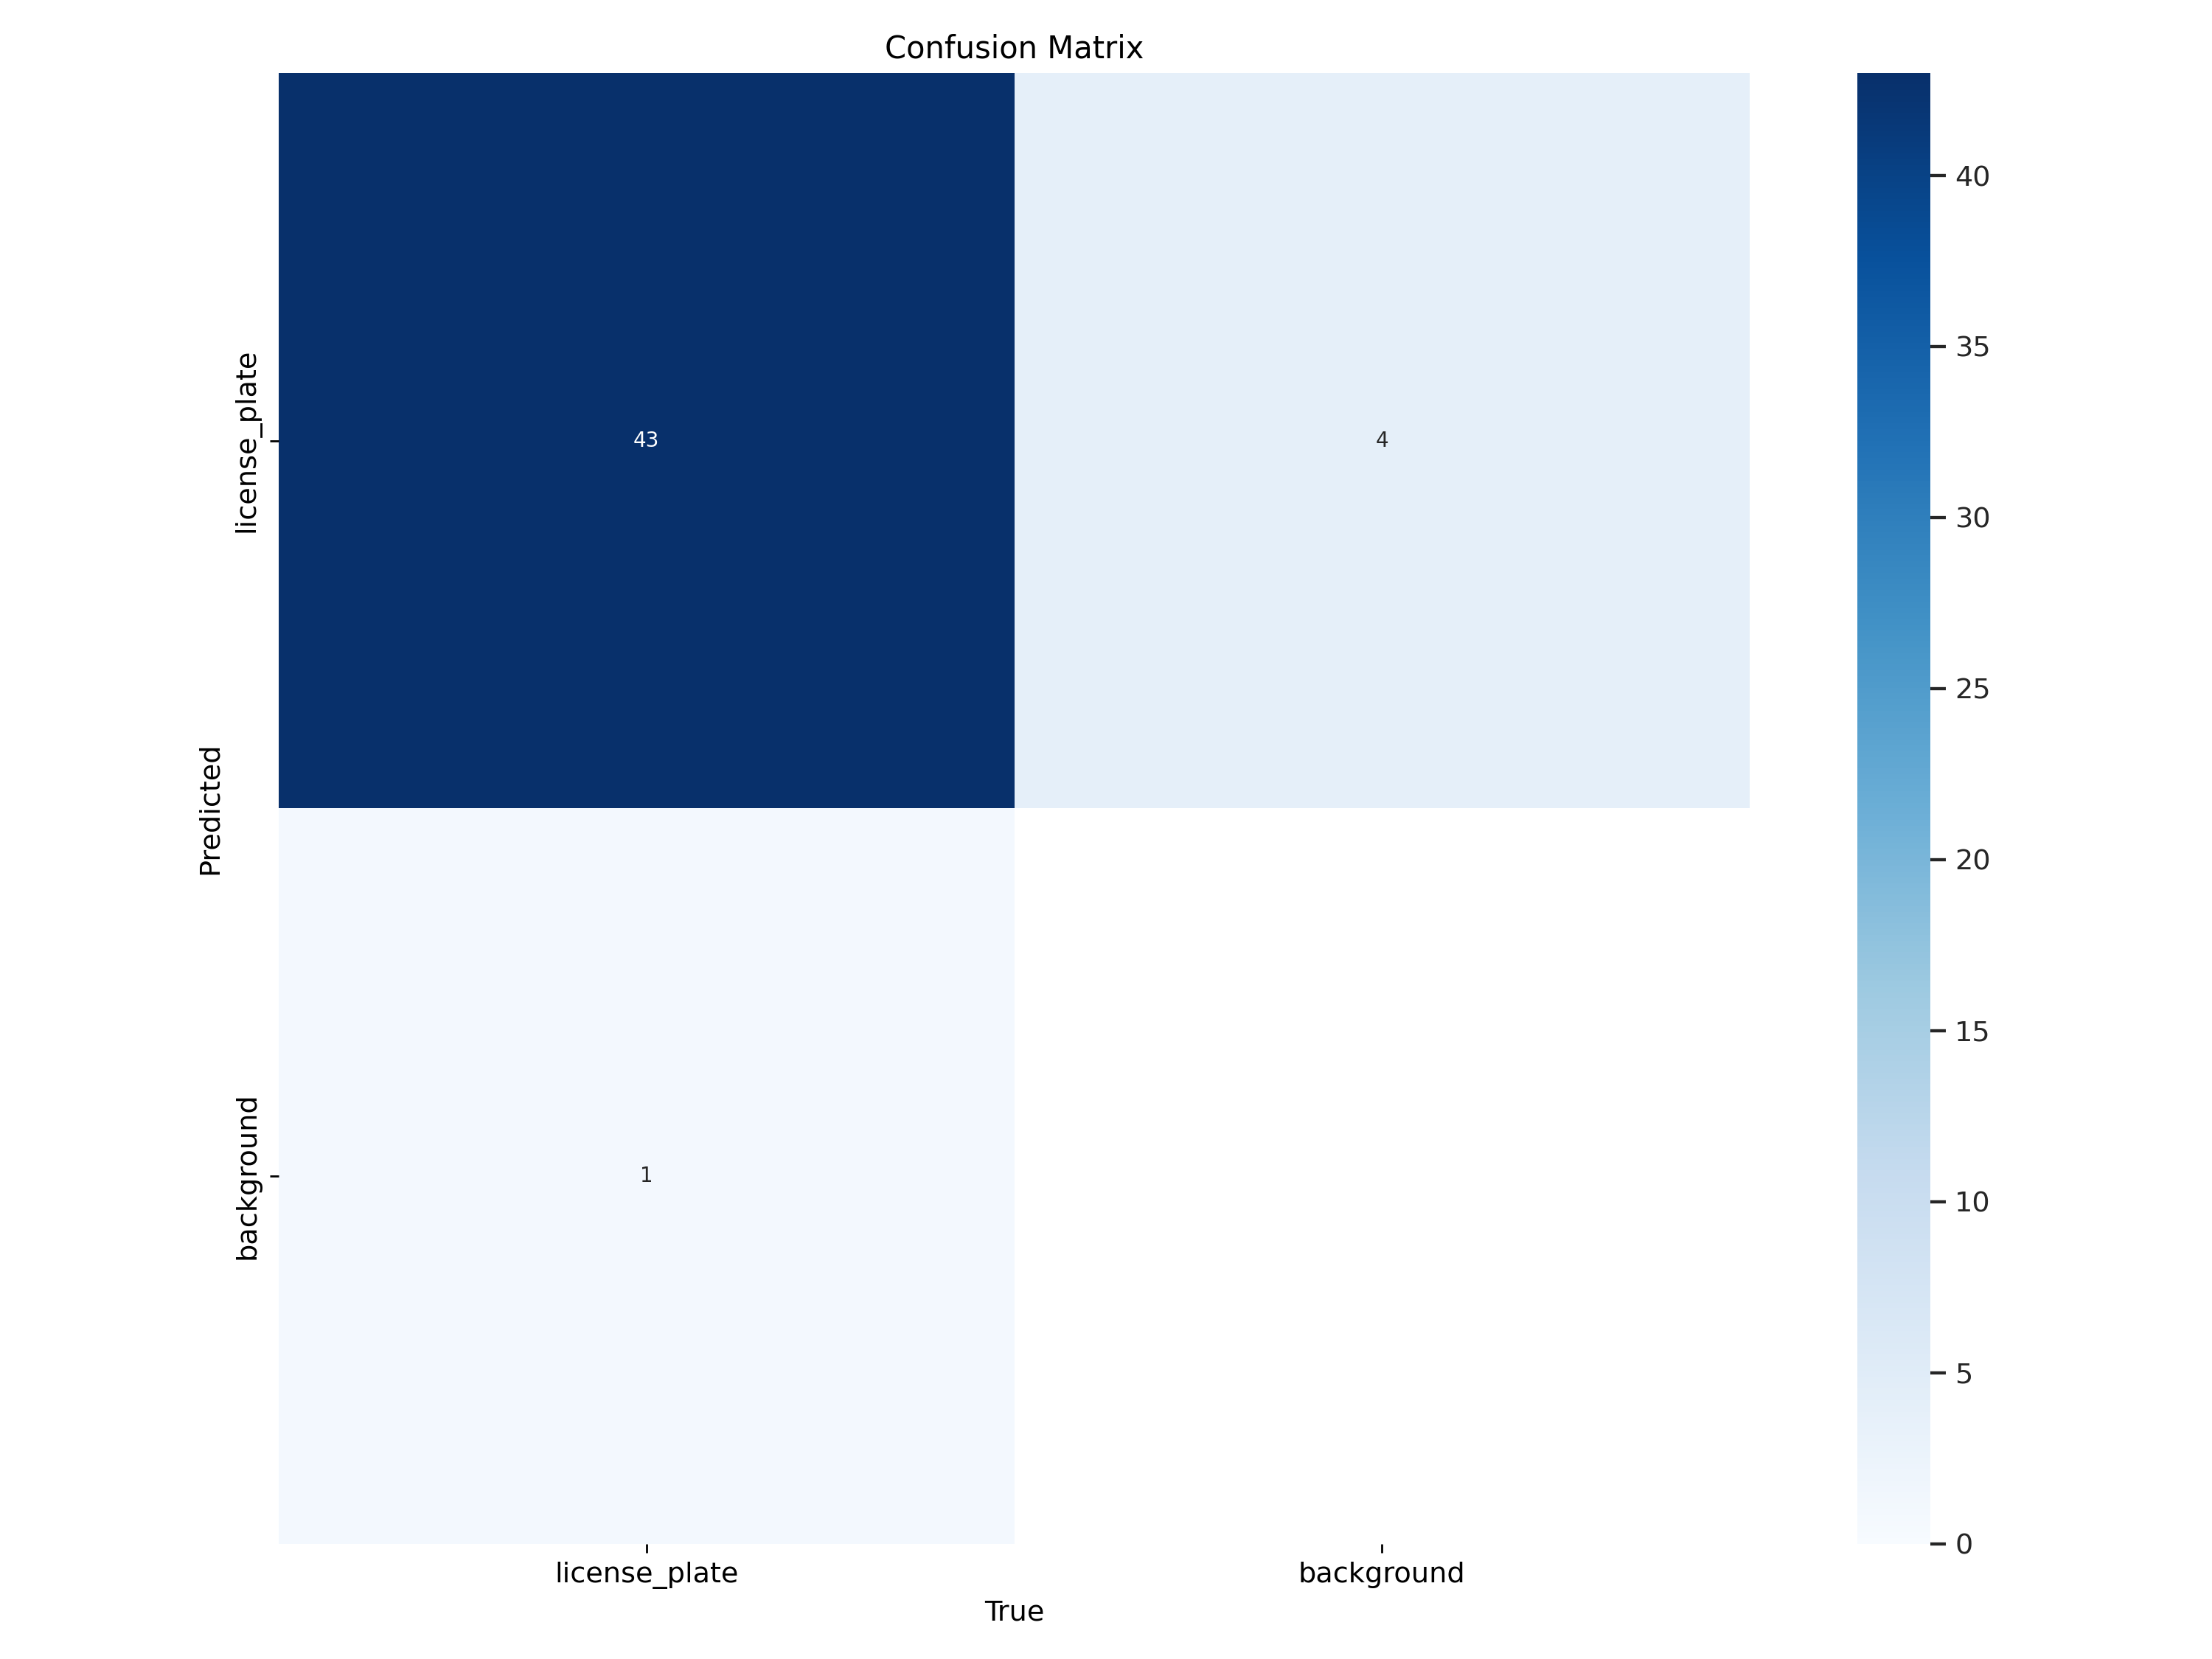

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename='/content/datasets/runs/detect/train2/confusion_matrix.png', width=600)

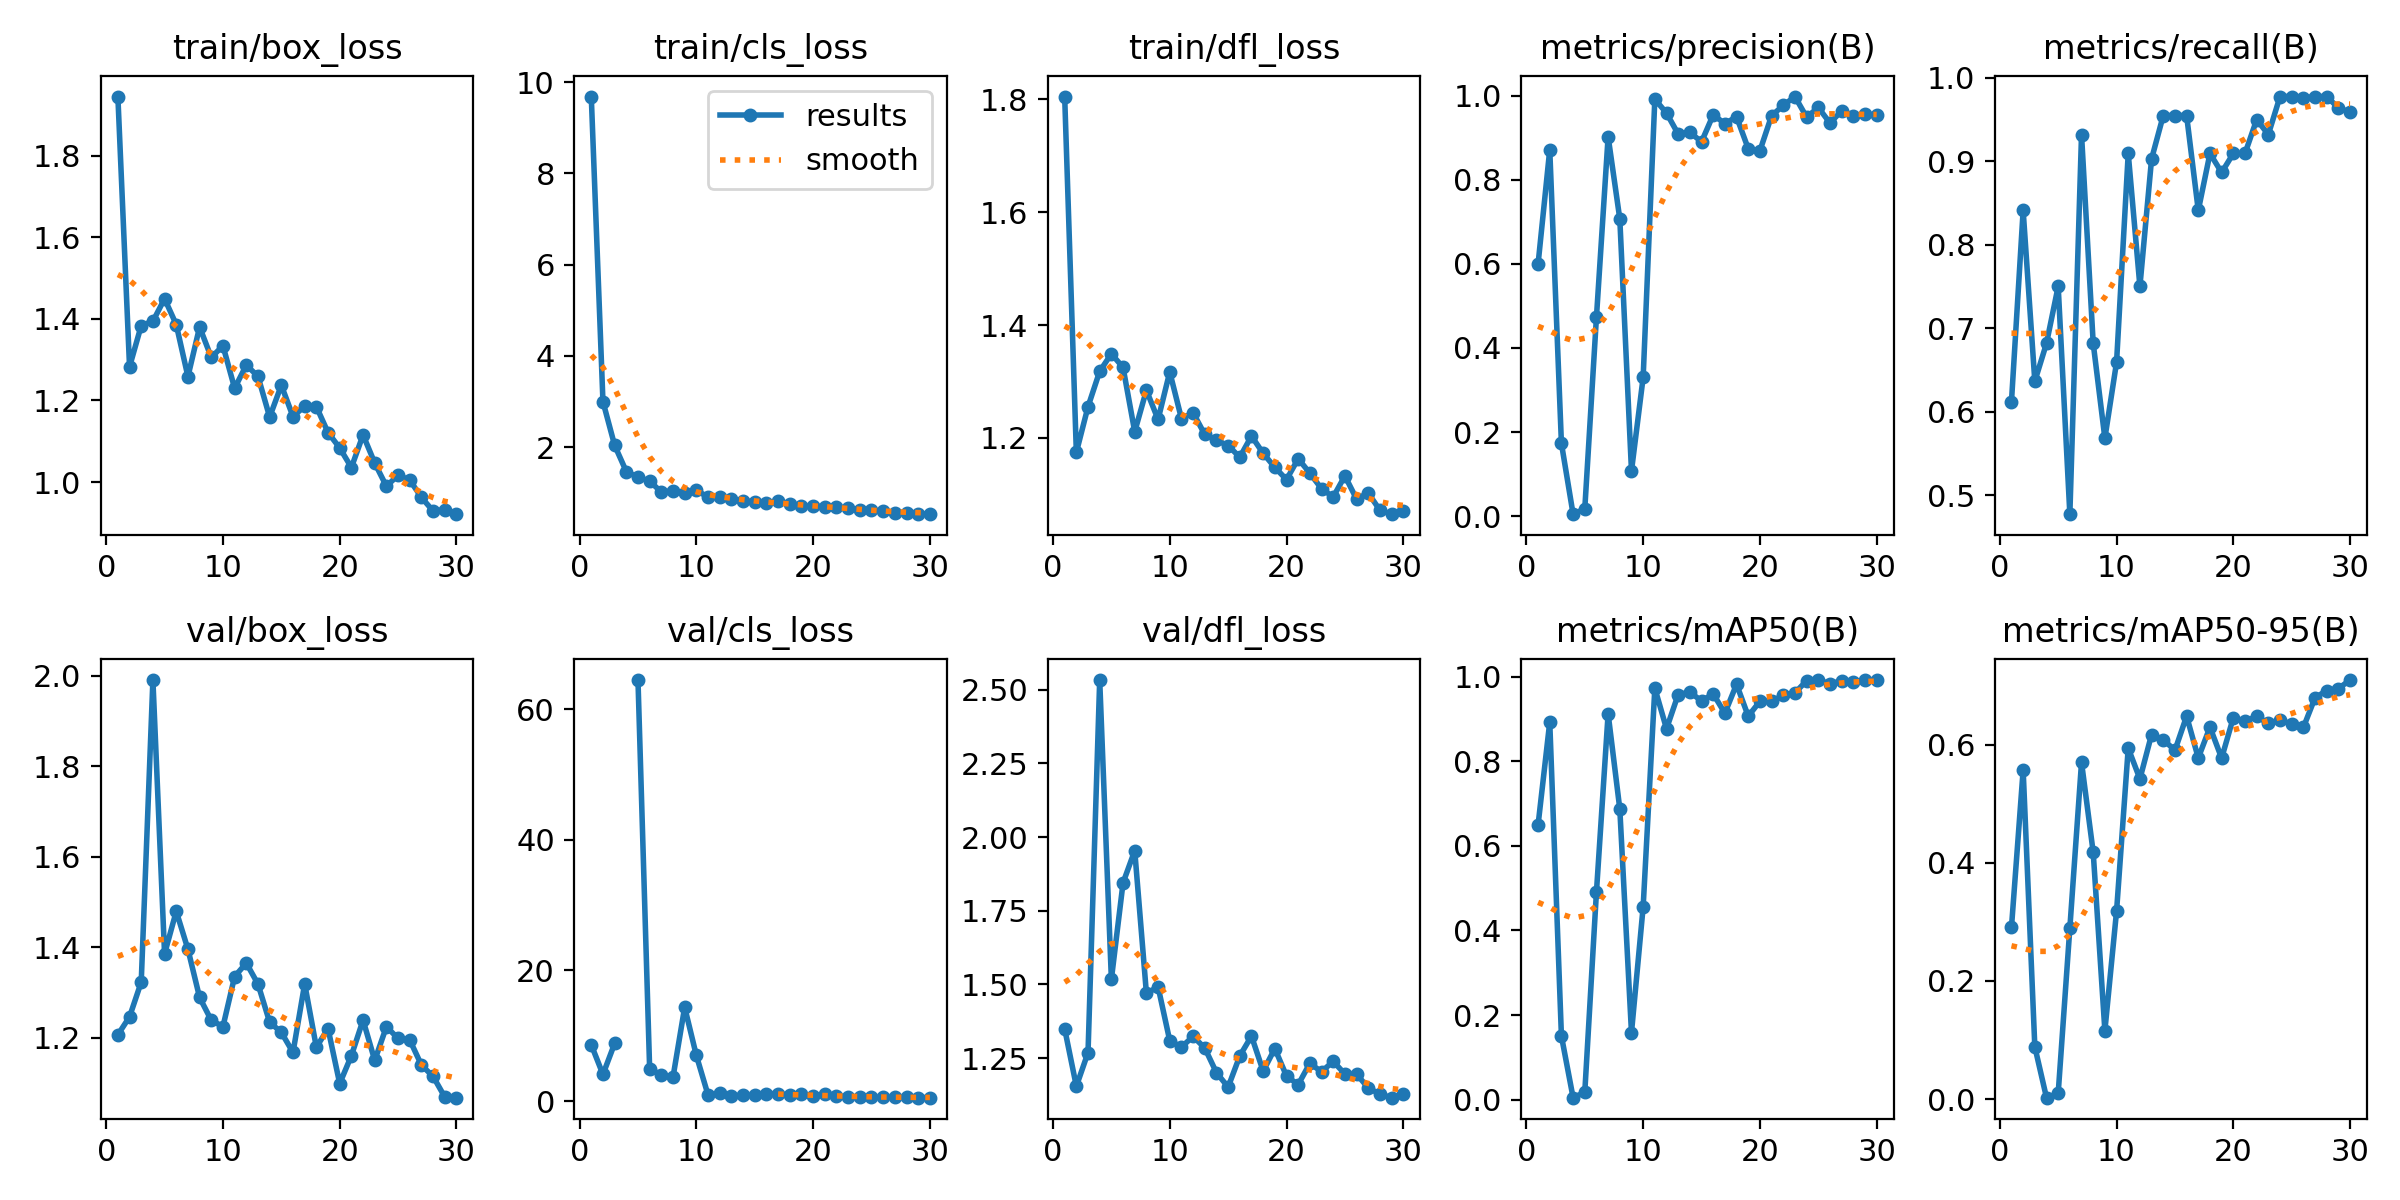

In [ ]:
IPyImage(filename='/content/datasets/runs/detect/train2/results.png', width=600)

## VALIDATION RESULTS

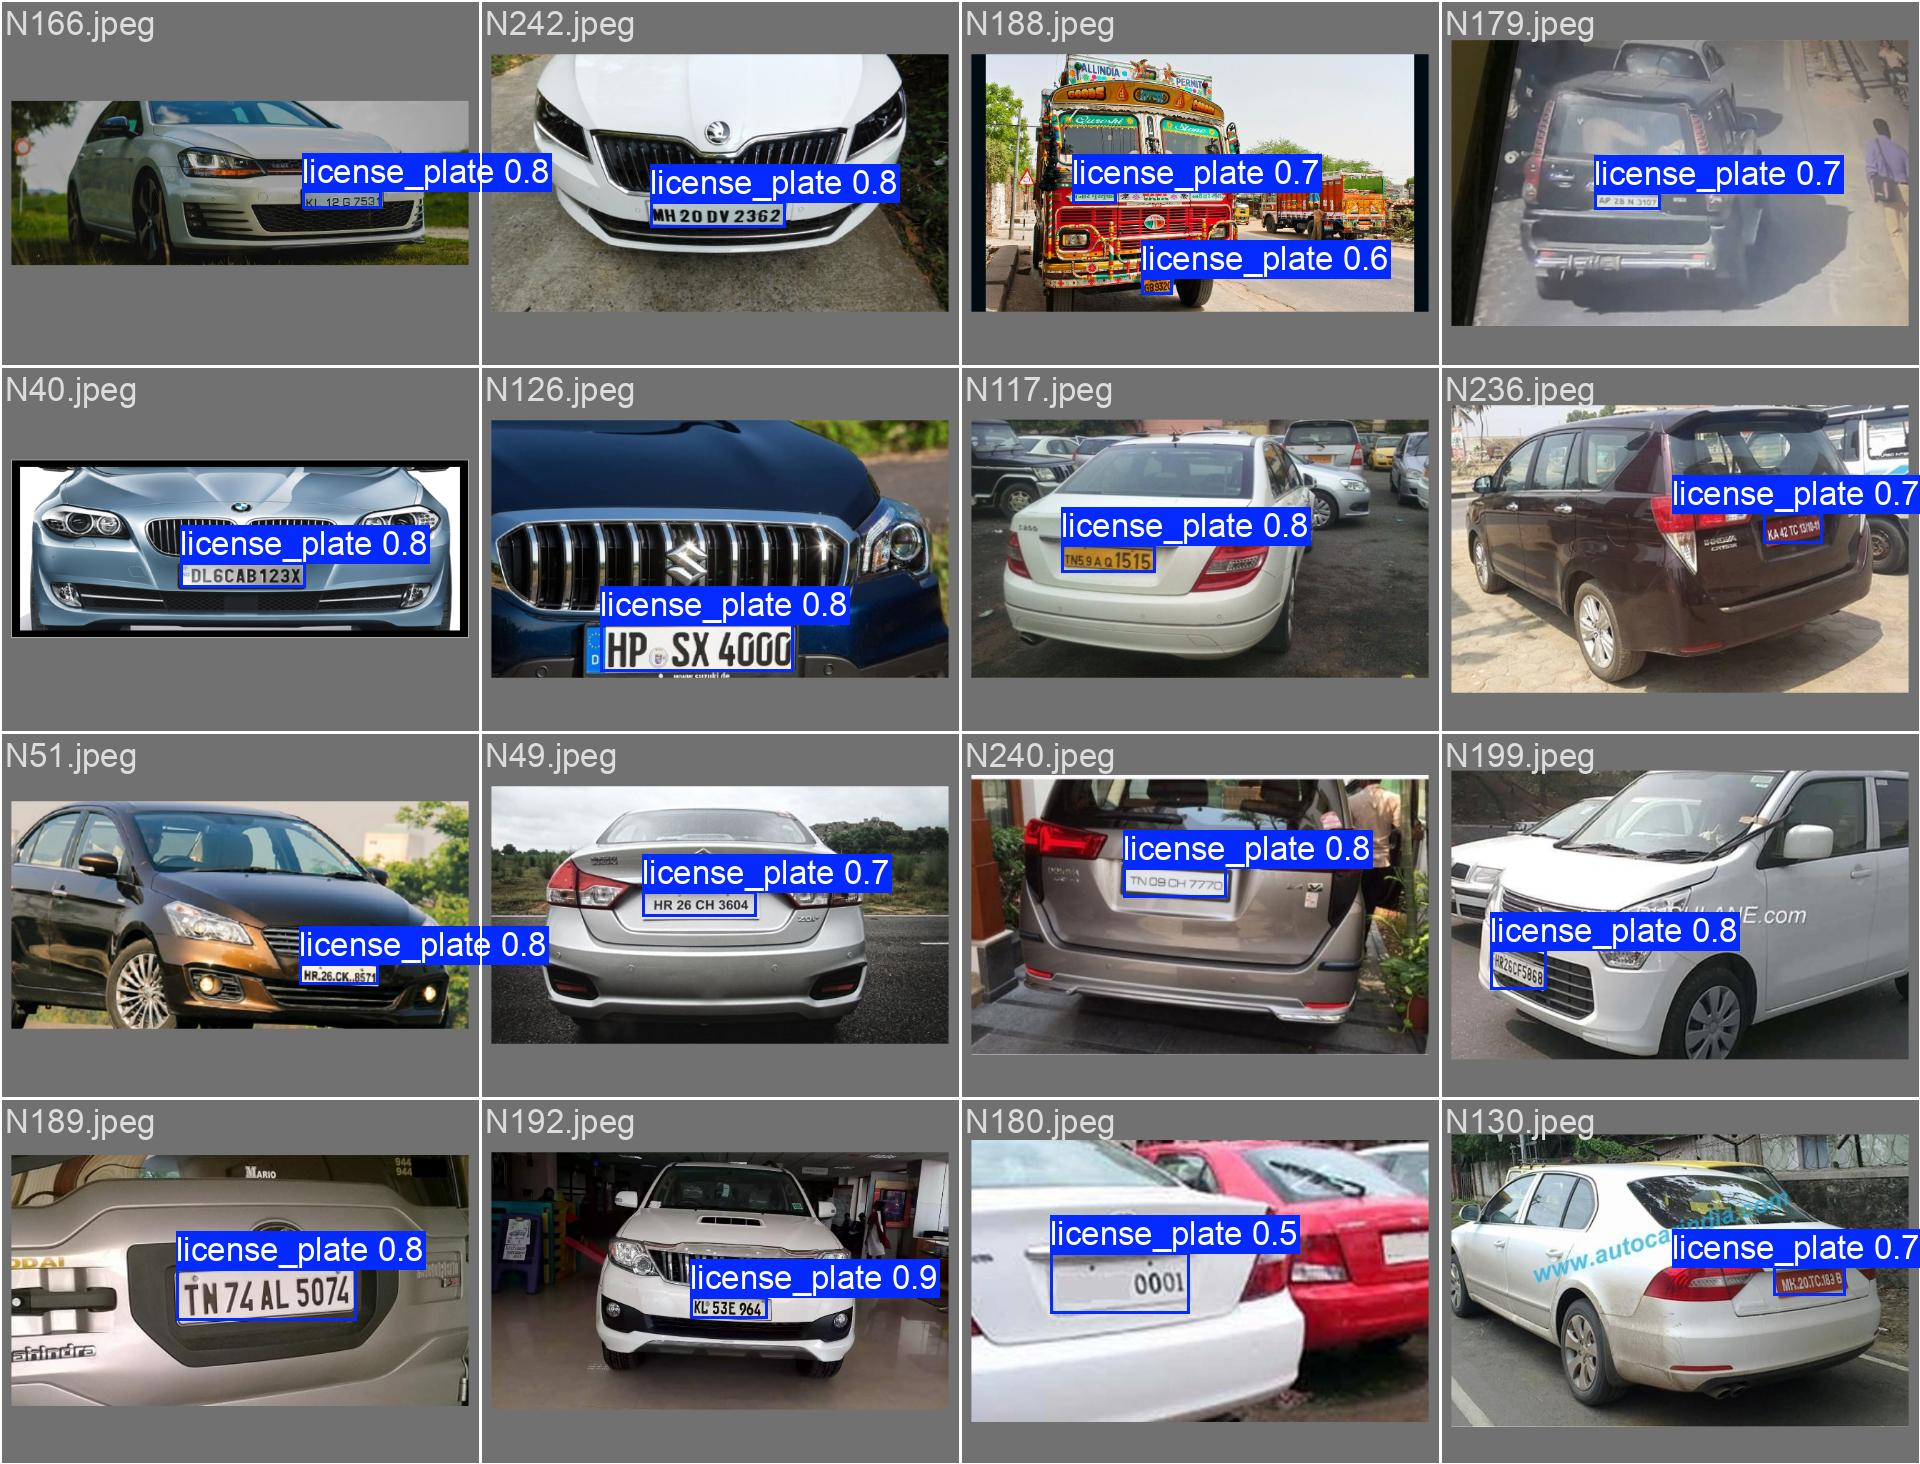

In [ ]:
IPyImage(filename='/content/datasets/runs/detect/train2/val_batch0_pred.jpg', width=600)

## DOWNLOADING THE MODEL

In [ ]:
from google.colab import files

file_path = '/content/datasets/runs/detect/train2/weights/best.pt'

files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## THE TEST RESULTS OF THE MODEL

In [ ]:
!unzip -q '/content/ANPR Test.zip' -d /content/images/

In [ ]:
model = YOLO('/content/datasets/runs/detect/train2/weights/best.pt')


image 1/1 /content/images/ANPR Test/Cars1.png: 416x640 (no detections), 12.5ms
Speed: 1.7ms preprocess, 12.5ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)
No detections for /content/images/ANPR Test/Cars1.png

image 1/1 /content/images/ANPR Test/Cars8.png: 384x640 1 license_plate, 11.6ms
Speed: 1.6ms preprocess, 11.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


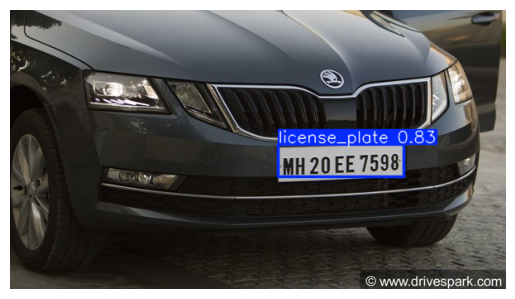


image 1/1 /content/images/ANPR Test/Cars9.png: 320x640 1 license_plate, 16.8ms
Speed: 2.0ms preprocess, 16.8ms inference, 1.6ms postprocess per image at shape (1, 3, 320, 640)


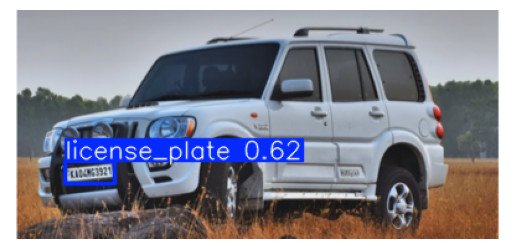


image 1/1 /content/images/ANPR Test/Cars4.png: 448x640 1 license_plate, 13.2ms
Speed: 2.7ms preprocess, 13.2ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


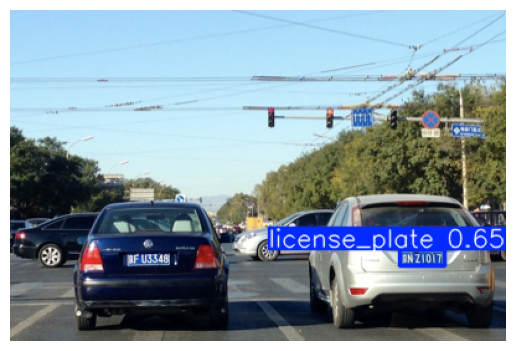


image 1/1 /content/images/ANPR Test/Cars5.png: 448x640 1 license_plate, 12.3ms
Speed: 2.6ms preprocess, 12.3ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


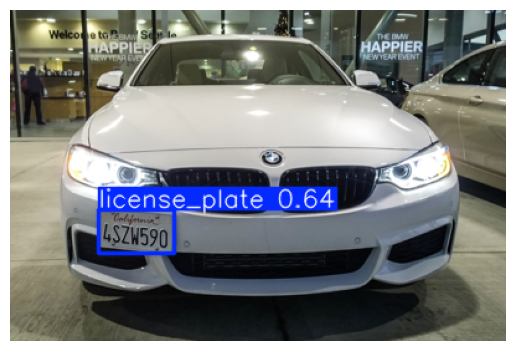


image 1/1 /content/images/ANPR Test/Cars6.png: 640x640 1 license_plate, 19.0ms
Speed: 3.8ms preprocess, 19.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


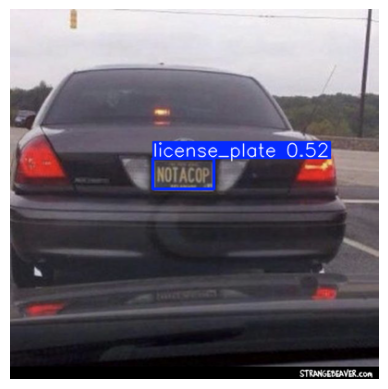


image 1/1 /content/images/ANPR Test/Cars2.png: 416x640 1 license_plate, 13.5ms
Speed: 2.5ms preprocess, 13.5ms inference, 4.8ms postprocess per image at shape (1, 3, 416, 640)


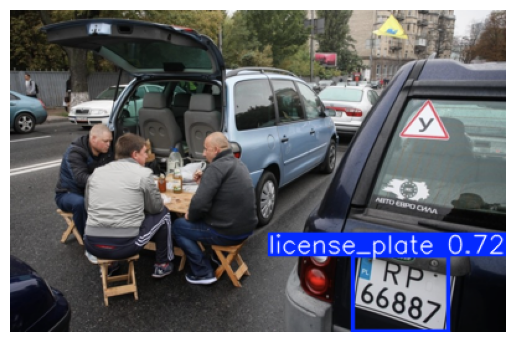


image 1/1 /content/images/ANPR Test/Cars3.png: 480x640 1 license_plate, 15.8ms
Speed: 2.8ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


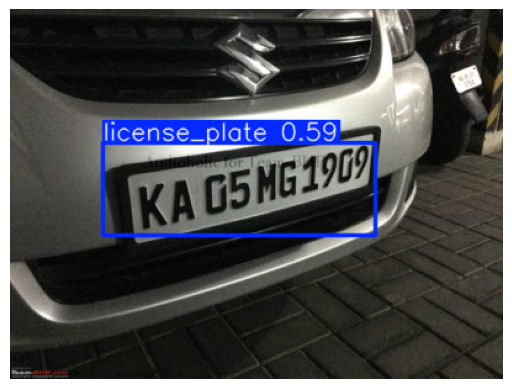


image 1/1 /content/images/ANPR Test/Cars7.png: 640x640 1 license_plate, 16.7ms
Speed: 3.6ms preprocess, 16.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


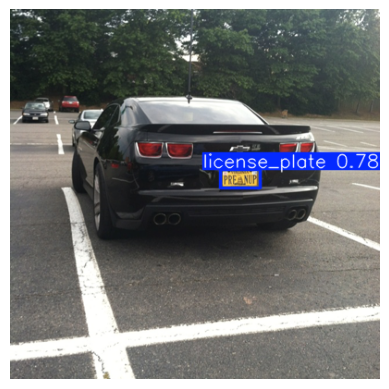

In [32]:
import glob
from PIL import Image
import matplotlib.pyplot as plt

predictions_dir = '/content/predictions'
os.makedirs(predictions_dir, exist_ok=True)

image_paths = glob.glob('/content/images/ANPR Test/*.png')

from ultralytics import YOLO
model = YOLO('/content/datasets/runs/detect/train2/weights/best.pt')

for img_path in image_paths[:9]:
    results = model(img_path)

    if len(results[0].boxes) > 0:

        result_img_path = os.path.join(predictions_dir, os.path.basename(img_path).replace('.png', '_pred.png'))

        results[0].plot()
        results[0].save(result_img_path)

        img_with_boxes = Image.open(result_img_path)
        plt.imshow(img_with_boxes)
        plt.axis('off')
        plt.show()
    else:
        print(f"No detections for {img_path}")
